In [29]:
import pandas as pd

adShoot = pd.read_csv("AdShooting.csv")
advanced = pd.read_csv("advanced.csv")
per36 = pd.read_csv("Per36.csv")
per100 = pd.read_csv("Per100.csv")
perGame = pd.read_csv("PerGame.csv")
PlaybyPlay = pd.read_csv("PlaybyPlay.csv")
shotType = pd.read_csv("ShotType.csv")
hustle = pd.read_csv("Hustle.csv", encoding='ISO-8859-1')


perGame['MP'] = perGame['MP'] * perGame['G']
#perGame = perGame.sort_values(by='MP', ascending=False)
#print(perGame)

perGame = perGame.drop(columns=['Rk'], errors='ignore')  # Optional: remove old rk if exists
perGame = perGame.merge(per100[['Player', 'Rk']], on='Player', how='left')
perGame = perGame.sort_values(by='Rk', ascending=True)
print(perGame)

player_ids = per100['Player']
player_idsH = hustle['Player']
#print(player_ids)

               Player  Age Team Pos   G  GS      MP   FG   FGA    FG%  ...  \
70      Mikal Bridges   28  NYK  SF  82  82  3034.0  7.2  14.4  0.500  ...   
116         Josh Hart   29  NYK  SG  77  77  2895.2  5.2  10.0  0.525  ...   
4     Anthony Edwards   23  MIN  SG  79  79  2867.7  9.1  20.4  0.447  ...   
11       Devin Booker   28  PHO  SG  75  75  2797.5  8.7  18.9  0.461  ...   
30       James Harden   35  LAC  PG  79  79  2788.7  6.7  16.4  0.410  ...   
..                ...  ...  ...  ..  ..  ..     ...  ...   ...    ...  ...   
561     Jesse Edwards   24  MIN   C   2   0     5.0  0.0   0.0    NaN  ...   
344     James Wiseman   23  IND   C   1   0     5.0  2.0   4.0  0.500  ...   
382  Alondes Williams   25  DET  SG   1   0     4.0  2.0   2.0  1.000  ...   
566       Zyon Pullin   23  MEM  SG   3   0     3.0  0.0   0.3  0.000  ...   
565     Jahlil Okafor   29  IND   C   1   0     3.0  0.0   0.0    NaN  ...   

     TRB  AST  STL  BLK  TOV   PF   PTS  Awards  Player-additio

In [30]:
adShoot = adShoot.drop(columns=["Awards" ,"-9999", "Rk"], axis=1)
advanced = advanced.drop(columns=["Awards" ,"Player-additional", "Rk"], axis=1)
per36 = per36.drop(columns=["Awards" ,"Player-additional", "Rk"], axis=1)
per100 = per100.drop(columns=["Awards" ,"Player-additional", "Rk"], axis=1)
perGame = perGame.drop(columns=["Awards" ,"Player-additional", "Rk"], axis=1)
PlaybyPlay = PlaybyPlay.drop(columns=["Awards" ,"-9999", "Rk"], axis=1)
shotType = shotType.drop(columns=["Awards" ,"-9999", "Rk"], axis=1)

In [32]:
players_1 = set(adShoot['Player'].str.strip())
players_2 = set(hustle['Player'].str.strip())


only_in_df1 = players_1 - players_2
only_in_df2 = players_2 - players_1

print("Players only in df1:", only_in_df1)
print("Players only in df2:", only_in_df2)




Players only in df1: {'Karlo Matković', 'Jeenathan Williams', 'Dennis Schröder', 'Ron Holland', 'Jusuf Nurkić', 'Lester Quiñones', 'Xavier Tillman Sr.', 'Kevin Knox', 'A.J. Green', 'Jeff Dowtin', 'Luka Dončić', 'Armel Traoré', 'Tidjane Salaün', 'Jonas Valančiūnas', 'Bogdan Bogdanović', 'Robert Williams', 'Terry Taylor', 'Jimmy Butler', 'Vasilije Micić', 'Nikola Jović', 'Tristan Da Silva', 'Kristaps Porziņģis', 'Skal Labissière', 'Dario Šarić', 'Moussa Diabaté', 'Brandon Boston Jr.', 'Nikola Jokić', 'GG Jackson II', 'Alondes Williams', 'Vlatko Čančar', 'Alperen Şengün', 'Trey Jemison', 'Nikola Vučević'}
Players only in df2: {'Tidjane Salaï¿½n', 'Jeff Dowtin Jr.', 'Armel Traorï¿½', 'Nikola JokiÄ\x87', 'Dennis Schrï¿½der', 'Jonas ValanÄ\x8diÅ«nas', 'Xavier Tillman', 'Alperen Sengun', 'Nikola Jovi?', 'Tristan da Silva', 'Ronald Holland II', 'Jimmy Butler III', 'Luka DonÄ\x8diÄ\x87', 'Nikola Vu?evi?', 'Bogdan BogdanoviÄ\x87', 'Moussa Diabatï¿½', 'Kevin Knox II', 'GG Jackson', 'Robert Willia

In [33]:
# Filter out players and fixing NA values
dataframes = ['adShoot', 'advanced', 'per36', 'per100', 'perGame', 'PlaybyPlay', 'shotType']

for name in dataframes:
    df = globals()[name]
    globals()[name] = df.loc[df['MP'] > 200]

for name in dataframes:
    df = globals()[name]
    globals()[name] = df.fillna(0)

#hustle = hustle.loc[hustle['MP'] > 200]
#hustle = hustle.fillna(0)
#player_included = per36["Player"]
#hustle = hustle[hustle['Player'].isin(player_included)]

#print(per36)
print(hustle)

             Player Team  Age  GP      MP   Min  Screen Assists  \
0      Tyrese Maxey  PHI   24  52  1960.4  37.7             0.3   
1         Josh Hart  NYK   30  77  2895.2  37.6             1.6   
2     Mikal Bridges  NYK   28  82  3075.0  37.5             0.4   
3      Devin Booker  PHX   28  75  2797.5  37.3             0.4   
4     Nikola JokiÄ  DEN   30  70  2569.0  36.7             4.3   
..              ...  ...  ...  ..     ...   ...             ...   
562  Tristen Newton  MIN   24   3     8.4   2.8             0.0   
563  Bryce McGowens  POR   22   6    13.8   2.3             0.0   
564  Isaiah Stevens  MIA   24   1     2.0   2.0             0.0   
565      Cui Yongxi  BKN   22   1     1.3   1.3             0.0   
566     Zyon Pullin  MEM   24   1     0.8   0.8             0.0   

     Screen Assists PTS  Unnamed: 8  OFF Loose Balls Recovered  \
0                   0.6         2.6                        0.3   
1                   3.7         2.8                        0.5 

In [34]:
corrections = {
    "Jeff Dowtin Jr.": "Jeff Dowtin",
    "Nikola JokiÄ\x87": "Nikola Jokić", 
    "Jonas ValanÄ\x8diÅ«nas": "Jonas Valančiūnas", 
    "Xavier Tillman": "Xavier Tillman Sr.", 
    "Alperen Sengun": "Alperen Şengün", 
    "Nikola Jovi?": "Nikola Jović", \
    "Tristan da Silva": "Tristan Da Silva", 
    "Ronald Holland II": "Ron Holland", 
    "Jimmy Butler III": "Jimmy Butler", 
    "Luka DonÄ\x8diÄ\x87": "Luka Dončić", 
    "Nikola Vu?evi?": "Nikola Vučević", 
    "Bogdan BogdanoviÄ\x87": "Bogdan Bogdanović", 
    "Kevin Knox II": "Kevin Knox", 
    "GG Jackson": "GG Jackson II", 
    "Robert Williams III": "Robert Williams", 
    "Trey Jemison III": "Trey Jemison", 
    "Kristaps PorziÅ\x86Ä£is": "Kristaps Porziņģis", 
    "Lester Quinones": "Lester Quiñones", 
    "Vasilije MiciÄ\x87": "Vasilije Micić",  
    "Karlo MatkoviÄ\x87": "Karlo Matković",
    "Jusuf NurkiÄ\x87": "Jusuf Nurkić", 
    "Dario Å\xa0ariÄ\x87": "Dario Šarić", 
    "AJ Green": "A.J. Green", 
    "Brandon Boston": "Brandon Boston Jr.", 
    "Skal Labissiere": "Skal Labissière", 
    "Vlatko Ä\x8canÄ\x8dar": "Vlatko Čančar"
}

hustle['Player'] = hustle['Player'].replace(corrections)

hustle = hustle.loc[hustle['MP'] > 200]
hustle = hustle.fillna(0)
#player_included = per36["Player"]
#hustle = hustle[hustle['Player'].isin(player_included)]

print(hustle)


                 Player Team  Age  GP      MP   Min  Screen Assists  \
0          Tyrese Maxey  PHI   24  52  1960.4  37.7             0.3   
1             Josh Hart  NYK   30  77  2895.2  37.6             1.6   
2         Mikal Bridges  NYK   28  82  3075.0  37.5             0.4   
3          Devin Booker  PHX   28  75  2797.5  37.3             0.4   
4          Nikola Jokić  DEN   30  70  2569.0  36.7             4.3   
..                  ...  ...  ...  ..     ...   ...             ...   
504         Pat Spencer  GSW   28  25   212.5   8.5             0.2   
507   Jordan McLaughlin  SAS   29  34   278.8   8.2             0.2   
509  Xavier Tillman Sr.  BOS   26  25   205.0   8.2             0.5   
518         Josh Minott  MIN   22  35   259.0   7.4             0.1   
535          Luka Garza  MIN   26  33   207.9   6.3             0.8   

     Screen Assists PTS  Unnamed: 8  OFF Loose Balls Recovered  \
0                   0.6         2.6                        0.3   
1              

In [35]:
# Standardizing numeric values
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

for name in dataframes:
    df = globals()[name]
    globals()['stand_' + name] = df.select_dtypes(include='number')

stand_hustle = hustle.select_dtypes(include='number')
    
dataframesStand = ['stand_adShoot', 'stand_advanced', 'stand_per36', 'stand_per100',
               'stand_perGame', 'stand_PlaybyPlay', 'stand_shotType']

#print(stand_adShoot)

for name in dataframesStand:
    df = globals()[name]
    globals()[name] = df.drop(columns=["Age","G","GS","MP"])

stand_hustle = stand_hustle.drop(columns=["Age","GP","MP","Min"])



for name in dataframesStand:
    df = globals()[name]
    globals()[name] = ss.fit_transform(df)

stand_hustle = ss.fit_transform(stand_hustle)


In [36]:
adShoot_drop = adShoot.drop(columns=["Age", "G", "GS", "MP", "Player", "Team", "Pos"])
PlaybyPlay_drop = PlaybyPlay.drop(columns=["Age", "G", "GS", "MP", "Player", "Team", "Pos"])
per36_drop = per36.drop(columns=["Age", "G", "GS", "MP", "Player", "Team", "Pos"])
advanced_drop = advanced.drop(columns=["Age", "G", "GS", "MP", "Player", "Team", "Pos"])
per100_drop = per100.drop(columns=["Age", "G", "GS", "MP", "Player", "Team", "Pos"])
shotType_drop = shotType.drop(columns=["Age", "G", "GS", "MP", "Player", "Team", "Pos"])
perGame_drop = perGame.drop(columns=["Age", "G", "GS", "MP", "Player", "Team", "Pos"])
hustle_drop = hustle.drop(columns=["Age","GP","MP","Min","Player","Team"])

#scaler = StandardScaler()
#stand_adShoot = scaler.fit_transform(adShoot_drop)

# Make sure the shapes match
assert stand_adShoot.shape[1] == len(adShoot_drop.columns)
assert stand_PlaybyPlay.shape[1] == len(PlaybyPlay_drop.columns)
assert stand_per36.shape[1] == len(per36_drop.columns)
assert stand_advanced.shape[1] == len(advanced_drop.columns)
assert stand_per100.shape[1] == len(per100_drop.columns)
assert stand_shotType.shape[1] == len(shotType_drop.columns)
assert stand_perGame.shape[1] == len(perGame_drop.columns)
assert stand_hustle.shape[1] == len(hustle_drop.columns)

df_adShoot = pd.DataFrame(stand_adShoot, columns=adShoot_drop.columns)
df_PlaybyPlay = pd.DataFrame(stand_PlaybyPlay, columns=PlaybyPlay_drop.columns)
df_per36 = pd.DataFrame(stand_per36, columns=per36_drop.columns)
df_advanced = pd.DataFrame(stand_advanced, columns=advanced_drop.columns)
df_per100 = pd.DataFrame(stand_per100, columns=per100_drop.columns)
df_shotType = pd.DataFrame(stand_shotType, columns=shotType_drop.columns)
df_perGame = pd.DataFrame(stand_perGame, columns=perGame_drop.columns)
df_hustle = pd.DataFrame(stand_hustle, columns=hustle_drop.columns)

print(df_hustle.head())

   Screen Assists  Screen Assists PTS  Unnamed: 8  OFF Loose Balls Recovered  \
0       -0.542876           -0.595748    1.331485                   0.617123   
1        0.853260            0.830669    1.597198                   2.283538   
2       -0.435481           -0.411694    0.135776                   1.450331   
3       -0.435481           -0.457707   -0.129937                   2.283538   
4        3.752926            3.683502    2.925764                   0.617123   

   DEF Loose Balls Recovered  Loose Balls Recovered  \
0                   1.444848               1.204320   
1                   3.960431               3.207851   
2                   0.606320               1.204320   
3                   0.606320               1.705203   
4                   0.606320               0.703437   

   % Loose BallsRecovered OFF  % Loose BallsRecovered DEF  Charges Drawn  \
0                   -0.844616                    0.873686      -0.242290   
1                   -0.642016       


Number of principal components needed to explain 95% of the variance: 32


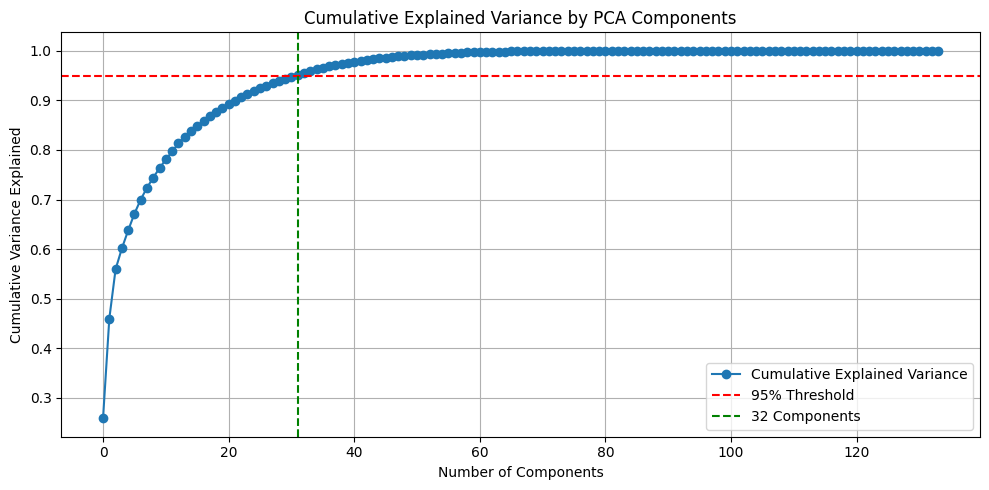


Average PCA Loading Strength per Dataset:
df_advanced: 0.0525
df_per100: 0.0517
df_perGame: 0.0508
df_PlaybyPlay: 0.0476
df_shotType: 0.0439
df_adShoot: 0.0425
df_hustle: 0.0424


In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Combine your DataFrames (already standardized, no 'Player' column)
dfNames = {
    'df_adShoot': df_adShoot,
    'df_PlaybyPlay': df_PlaybyPlay,
    'df_hustle': df_hustle,
    'df_advanced': df_advanced,
    'df_per100': df_per100,
    'df_shotType': df_shotType,
    'df_perGame': df_perGame
}

feature_matrices = []
dataset_order = []

for name, df in dfNames.items():
    feature_matrices.append(df)
    dataset_order.extend([name] * df.shape[1])

# Step 2: Concatenate all features horizontally
combined_features = pd.concat(feature_matrices, axis=1)

combined_features = combined_features.fillna(combined_features.mean())

# Step 3: Apply PCA
pca = PCA()
principal_components = pca.fit_transform(combined_features)


# Step 4: Explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Print number of components to reach 95% variance
n_components_95 = np.argmax(cumulative_var >= 0.95) + 1
print(f"\nNumber of principal components needed to explain 95% of the variance: {n_components_95}")

# Step 5: Plot cumulative variance
plt.figure(figsize=(10, 5))
plt.plot(cumulative_var, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.axvline(x=n_components_95 - 1, color='g', linestyle='--', label=f'{n_components_95} Components')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Dataset contribution to overall variance (via mean absolute loadings)
loadings = np.abs(pca.components_)  # shape: (n_components, total_features)

dataset_scores = {}
start = 0
for name, df in dfNames.items():
    width = df.shape[1]
    avg_loading = loadings[:, start:start + width].mean()
    dataset_scores[name] = avg_loading
    start += width

# Step 7: Print dataset influence
print("\nAverage PCA Loading Strength per Dataset:")
for name, score in sorted(dataset_scores.items(), key=lambda x: -x[1]):
    print(f"{name}: {score:.4f}")




In [46]:
# Normalize dataset_scores into weights
total_score = sum(dataset_scores.values())
weights = {k: v / total_score for k, v in dataset_scores.items()}

print("\nNormalized Weights:")
for k, v in weights.items():
    print(f"{k}: {v:.4f}")



Normalized Weights:
df_adShoot: 0.1281
df_PlaybyPlay: 0.1437
df_hustle: 0.1280
df_advanced: 0.1584
df_per100: 0.1559
df_shotType: 0.1324
df_perGame: 0.1534
